# Keras Functional model

- Used for creating non linear Neural Networks having multiple input layers and multiple output layers.

- Sequential Api of keras fails in that aspect that why we use **Keras Functional Api**



In [3]:
from keras.models import Model
from keras.layers import *

## Multiple outputs

In [5]:
x = Input(shape=(3,))

h1 = Dense(128,activation='relu')(x)
h2 = Dense(64,activation='relu')(h1)

output1 = Dense(1,activation='linear')(h2)
output2 = Dense(1,activation='sigmoid')(h2)

model = Model(inputs = x ,outputs =[output1,output2])

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │            512 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

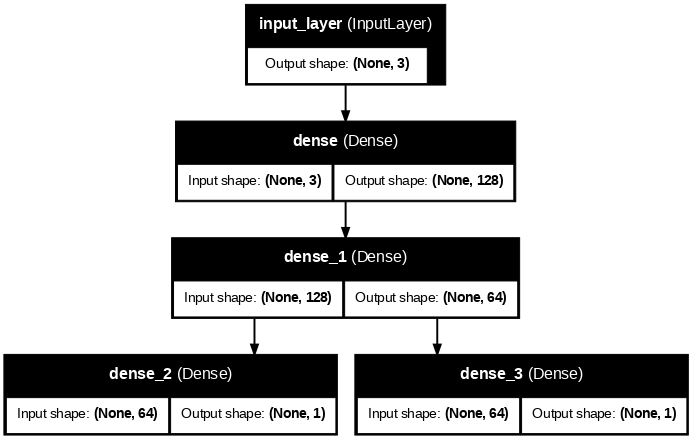

In [11]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,dpi=70)

## Multiple Inputs

In [15]:
input1 = Input(shape=(32,))
input2 = Input(shape=(128,))

h1 = Dense(8,activation='relu')(input1)
h2 = Dense(4,activation='relu')(h1)

h3 = Dense(64,activation='relu')(input2)
h4 = Dense(32,activation='relu')(h3)
h5 = Dense(4,activation='relu')(h4)

combined = concatenate([h2,h5])

z = Dense(2,activation='relu')(combined)
output = Dense(1,activation='linear')(z)

model = Model(inputs=[input1,input2],outputs=output)

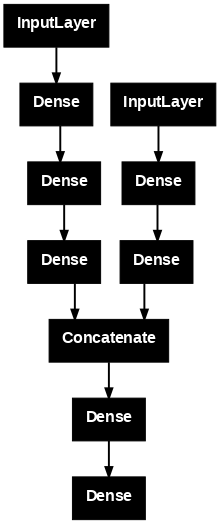

In [23]:
plot_model(model,dpi=70)